In [ ]:
#import necessary packages
import cv2
import numpy as np
import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#initialize desired resolution
height = 256
width = 256

In [ ]:
#set the path to the image and mask dataset
path = "aggregatedSet/" #change accordingly (e.g. "aggregatedSet/", "shenzhenSet/", "darwinSet/")
imagesPath = path + "img/*.png"
maskPath = path + "mask/*.png"

In [ ]:
#print the number of detected images and masks in the folder; must be equal to ensure each image has a corresponding mask
print("The number of detected images and masks in the folder: ")
listOfImages = glob.glob(imagesPath)
listOfMaskImages = glob.glob(maskPath)

print(len(listOfImages))
print(len(listOfMaskImages))

Images in folder, left mask images, right mask images: 
6810
6810


In [ ]:
#print the first image and mask to verify they are loaded correctly
img = cv2.imread(listOfImages[0], cv2.IMREAD_COLOR)
mask = cv2.imread(listOfMaskImages[0], cv2.IMREAD_COLOR)

print(img.shape)
print(mask.shape)

(512, 512, 3)
(512, 512, 3)


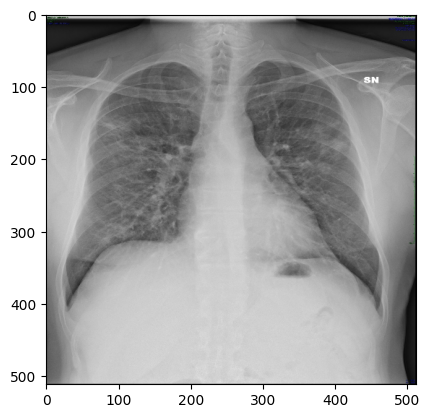

In [ ]:
#display the first image
plt.imshow(img)
plt.show()

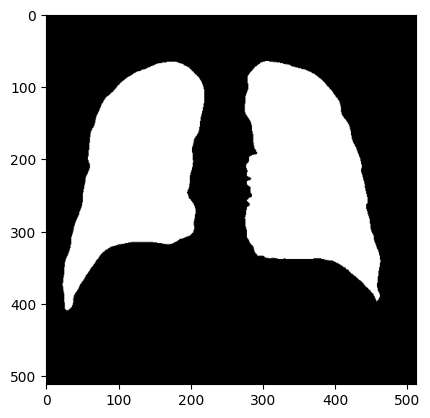

In [ ]:
#dispay the first mask
plt.imshow(mask)
plt.show()

In [ ]:
#initialize an empty list to store all images and masks
allImages = []
maskImages = []

In [ ]:
#load the images and masks, resize them to the desired resolution, normalize them, and store them in the lists
print("start loading the train images and masks")
for imgFile, maskFile in tqdm(zip(listOfImages, listOfMaskImages), total=len(listOfImages)):
    img = cv2.imread(imgFile, cv2.IMREAD_COLOR) 
    img = cv2.resize(img, (width, height))
    img = img / 255.0 
    img = img.astype(np.float32)
    allImages.append(img)
    
    mask = cv2.imread(maskFile, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (width, height))
    
    mask[mask>0] = 1
    maskImages.append(mask)

start loading the train images and masks + image augmentation x3


100%|██████████| 6810/6810 [00:44<00:00, 152.62it/s]


In [ ]:
#convert the lists to numpy arrays for further processing
allImagesNP = np.array(allImages)
maskImagesNP = np.array(maskImages)
maskImagesNP = maskImagesNP.astype(int)

In [ ]:
#print the shapes of the numpy arrays containing images and masks
print("Shapes of train images and masks: ")
print(allImagesNP.shape)
print(maskImagesNP.shape)

Shpaes of train images and masks: 
(6810, 256, 256, 3)
(6810, 256, 256)


In [ ]:
#split the dataset into training and validation sets
split = 0.1 #change this value to adjust the split ratio
train_imgs, valid_imgs = train_test_split(allImagesNP, test_size=split, random_state=42)
train_masks, valid_masks = train_test_split(maskImagesNP, test_size=split, random_state=42)

In [ ]:
#print the shapes of the training and validation sets
print("Shapes of train images and masks: ")
print(train_imgs.shape)
print(train_masks.shape)

print("\n Shapes of validation images and masks: ")
print(valid_imgs.shape)
print(valid_masks.shape)

Shapes of train images and masks: 
(6129, 256, 256, 3)
(6129, 256, 256)
Shapes of validation images and masks: 
(681, 256, 256, 3)
(681, 256, 256)


In [ ]:
#save the training and validation sets to .npy files for later use
print("Save the data: ")
np.save("data/Unet-Train-Lung-Images.npy", train_imgs)
np.save("data/Unet-Train-Lung-Masks.npy", train_masks)

np.save("data/Unet-Validate-Lung-Images.npy", valid_imgs)
np.save("data/Unet-Validate-Lung-Masks.npy", valid_masks)

print("Finished saving the data")

Save the data: 
Finished saving the data
